<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/develop/kaggle_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use seaborn for the correlation heatmap
!pip install seaborn

In [0]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

# Time related libraries
import time

In [2]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#Unzipping if needed
!unzip creditcard.zip

In [3]:
#read file & check the upload
df = pd.read_csv('train.csv')
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data_shape = df.shape
print(data_shape)

(891, 12)


In [4]:
#data cleaning & exploration
unknown_count = df.isna().sum().drop_duplicates()
unknown_count[unknown_count>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
measurements = df.select_dtypes(include=[np.number])
categories = df.select_dtypes(exclude=[np.number])
list(measurements.columns)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

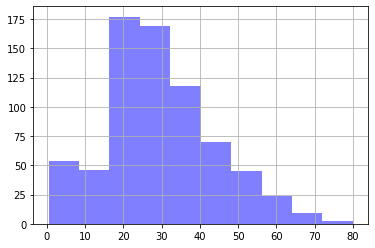

In [6]:
#Parmeters plots
df["Age"].hist(alpha=0.5, color='blue')

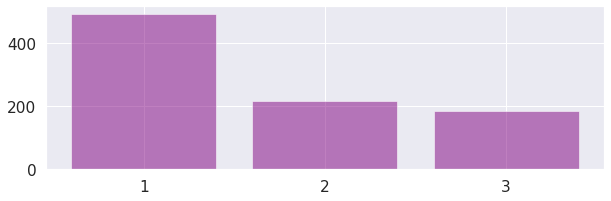

In [0]:
    counts_per_label = df["Pclass"].value_counts()
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.bar(['1','2','3'], counts_per_label, color = 'purple', alpha = 0.5)
    #fig.suptitle(item[1])
    plt.xticks(rotation=0)
    plt.show()

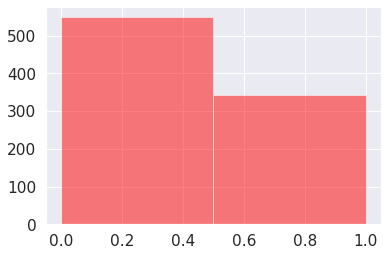

In [0]:
df["Survived"].hist(alpha=0.5, color='red', bins = 2)

In [6]:
# imputing missing values
av_age = df['Age'].mean()
print(av_age)
df['Age']=df['Age'].fillna(av_age)
embarked_counts = df['Embarked'].value_counts()
emb_sub = embarked_counts.index[0]
df['Embarked']=df['Embarked'].fillna(emb_sub)
unknown_count = df.isna().sum().drop_duplicates()
unknown_count[unknown_count>0]

29.69911764705882


Cabin    687
dtype: int64

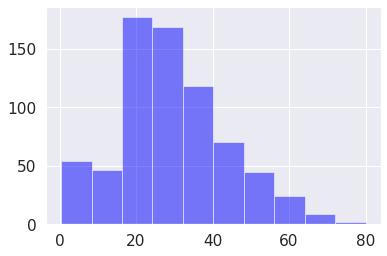

In [0]:
df["Age"].hist(alpha=0.5, color='blue')

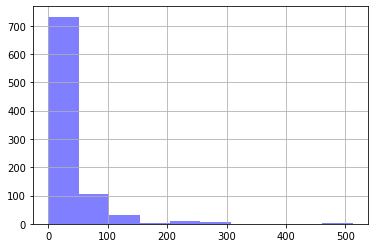

In [26]:
df["Fare"].hist(alpha=0.5, color='blue')

In [0]:
#scatter plots
  plt.scatter(x=measurements['Survived'].values, y=measurements['Fare'].values)
  plt.xlabel('Survived')
  plt.xticks(rotation=45)
  plt.ylabel('Fare')
  plt.show()

In [0]:
# CORRELATIONS

# Correlation Plots
# Parameters
THRESHOLD = 0.7 # Correlation Coefficient Threshold of Interest
#printing formats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sample to calculate correlations (using filtered set of column, run exlusion calculation first)
#df_model1_sample = measurements_filtered.sample(frac=0.3, random_state=42)
df_sample = measurements.sample(frac=0.3, random_state=42)

start = time.time()

# Correlations, positive and negative. Round to 2 decimals and filling NaN with O
df_corr = round(df_sample.corr(),6).fillna(0)

print("CORRELATION MATRIX")
#print(df_corr.drop(['PassengerId'], axis = 1).drop(['PassengerId'], axis = 0))
print(df_corr)
column_list = list(df_corr.columns)
column_set = set()
n_col = len(column_list)

corr_ranking=[] # initializing array of highly correlated pairs
for i in range(n_col-1):
  for j in range(i):
    if abs(df_corr.values[j][i]) > 0.2:
      temp=df_corr.values[j][i], column_list[i],column_list[j]
      corr_ranking.append(temp)
print (corr_ranking)
# selecting subset of columns for plotting:
for item in corr_ranking:
  column_set.add(item[1])
  column_set.add(item[2])
print(column_set)
df_corr_plot = round(df_sample[list(column_set)].corr(),6).fillna(0)
print(df_corr_plot)
print("Running time in seconds =", time.time() - start)

CORRELATION MATRIX
             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.032371 -0.011611  0.048282  0.035927 -0.017838 -0.004362
Survived       -0.032371  1.000000 -0.386329 -0.077268  0.029034  0.096750  0.304799
Pclass         -0.011611 -0.386329  1.000000 -0.399426  0.021231 -0.012707 -0.607146
Age             0.048282 -0.077268 -0.399426  1.000000 -0.273329 -0.186618  0.101761
SibSp           0.035927  0.029034  0.021231 -0.273329  1.000000  0.355631  0.195323
Parch          -0.017838  0.096750 -0.012707 -0.186618  0.355631  1.000000  0.236692
Fare           -0.004362  0.304799 -0.607146  0.101761  0.195323  0.236692  1.000000
[(-0.386329, 'Pclass', 'Survived'), (-0.399426, 'Age', 'Pclass'), (-0.273329, 'SibSp', 'Age'), (0.355631, 'Parch', 'SibSp')]
{'Parch', 'SibSp', 'Age', 'Survived', 'Pclass'}
             Parch     SibSp       Age  Survived    Pclass
Parch     1.000000  0.355631 -0.186618  0.096750 -0.012707
SibSp     

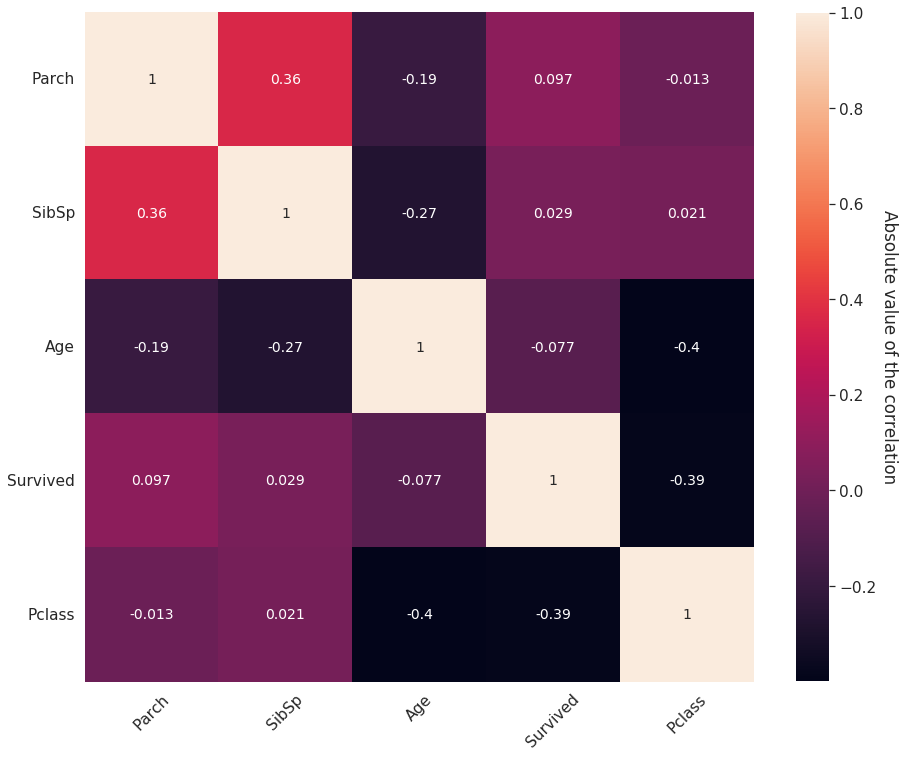

In [0]:
# HeatMap Using Seaborn
sns.set()
# this scales up all text, but does not affect annot (see annot_kws={'size':1.4})
sns.set(font_scale=1.4)
fig = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(0, 359, as_cmap=True)
# annot controls the correlation values display, bizarre shrink-value properly scales the colorbar 
ax = sns.heatmap(df_corr_plot, square=True, cbar_kws={'shrink': 0.82}, annot=True, annot_kws={'size': 14})
# take care of the labels printing
labels_list = df_corr_plot.columns
# this centers and prints horizontally the y labels
ax.set_yticklabels(labels_list, rotation=0, va='center')
# this rotates the x labels
ax.set_xticklabels(labels_list, rotation=45, va='top')
ax.collections[0].colorbar.set_label('Absolute value of the correlation', rotation=-90, va='bottom')
plt.show()

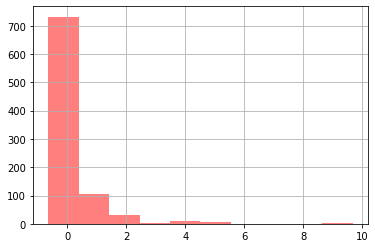

In [7]:
#Data Normalization - Fare
#Standard Scaler
X = df['Fare'].values.reshape(-1,1)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
fare_norm = pd.DataFrame(data=rescaledX, columns=["Norm_Fare"])
fare_norm["Norm_Fare"].hist(alpha=0.5, color='red')

#Data Normalization Age
#Standard Scaler
X_age = df['Age'].values.reshape(-1,1)
scaler_age = StandardScaler().fit(X)
rescaledX_age = scaler_age.transform(X)

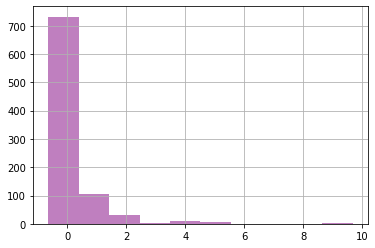

In [8]:
#MinMaxScaler
scaler_min_max = MinMaxScaler(feature_range=(0, 1))
rescaledX_min_max = scaler_min_max.fit_transform(X)
fare_norm_min_max = pd.DataFrame(data=rescaledX, columns=["Norm_Fare_Min_Max"])
fare_norm_min_max["Norm_Fare_Min_Max"].hist(alpha=0.5, color='purple')

scaler_min_max_age = MinMaxScaler(feature_range=(0, 2))
rescaledX_min_max_age = scaler_min_max.fit_transform(X_age)

In [9]:
# adding column to the dataframe with normalized data:
df['fare norm'] = rescaledX
df['age_norm'] = rescaledX_min_max_age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare norm,age_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502445,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786845,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420730,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486337,0.434531


In [10]:
features = ["age_norm","Pclass", "Sex", "SibSp", "Parch"]
#features = ["Pclass", "Fare","Sex", "Embarked"]
# X dataframe conatains a set of cleaned up & scaled(for numerics) predictores ready for one-hot encoding 
X = pd.get_dummies(df[features]);X.head(10)

,age_norm,Pclass,SibSp,Parch,Sex_female,Sex_male
0,0.271174,3,1,0,0,1
1,0.472229,1,1,0,1,0
2,0.321438,3,0,0,1,0
3,0.434531,1,1,0,1,0
4,0.434531,3,0,0,0,1
5,0.367921,3,0,0,0,1
6,0.673285,1,0,0,0,1
7,0.019854,3,3,1,0,1
8,0.334004,3,0,2,1,0
9,0.170646,2,1,0,1,0


In [13]:
list(X.columns)

['age_norm', 'Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']

In [0]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X.values, df['Survived'].values, test_size=0.2, random_state=42)

**Models Section**

*Random Fores*

In [12]:
#Random Forest - Clasisfier & Feature Importance Caliculations
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model = model.fit(X_train, y_train)
features_rf = rf_model.feature_importances_
print(features_rf)
predictions = model.predict(X_test); predictions

[0.13698065 0.17227006 0.06191286 0.04357801 0.30853323 0.27672519]


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [0]:
feature_importances = sorted(zip(features_rf,list(X.columns)), reverse = True); feature_importances

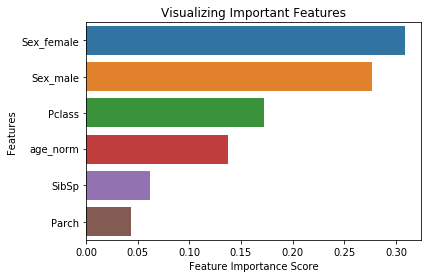

In [14]:
# Plotting Feature Importances
feature_imp = [item[0] for item in feature_importances]
feature_imp_index = [item[1] for item in feature_importances]
sns.barplot(x=feature_imp, y=feature_imp_index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [0]:
#Random Regression Forest Feature Importance
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)

In [30]:
#Logistic Regression
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)
predictions_lr = model.predict(X_test)
#Logistic Regression Modell Coeff (compare those with feature importances from Random Forest)
print(model_lr.coef_)
#[[-1.79899995 -0.98862957 -0.27936271 -0.08392462  1.33011321 -1.33009882]] age_norm	Pclass	SibSp	Parch	Sex_female	Sex_male

[[-1.52072988 -0.91545884 -0.26626052 -0.0703904   2.17612266 -0.44849377]]


In [0]:
#xgboost

model = XGBClassifier()
 
# fit the model with the training data
model.fit(train_x,train_y)
 
 
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 
 
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

In [0]:
#neural net

**Outliers Detection & PCA**

In [0]:
# PCA - 2D view
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
#PCA Visualization

**Accuracy & Perf Analysis**

In [25]:
#Results Estimates
accuracy_score(y_test, y_pred)

0.8212290502793296

In [29]:
#Results Estimates
accuracy_score(y_test, predictions_lr)

0.7932960893854749

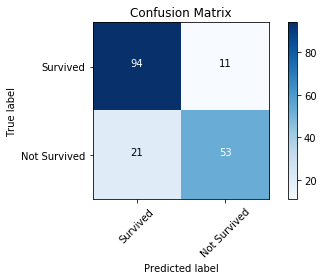

In [15]:
  #Confusion Matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
classes = ['Survived','Not Survived']
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], fmt),horizontalalignment="center",color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [16]:
Recall = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
Precision = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Recall - {}; Precision - {}'.format(Recall,Precision))

Recall - 0.8173913043478261; Precision - 0.8952380952380953


Confusion matrix
[[91 14]
 [23 51]]


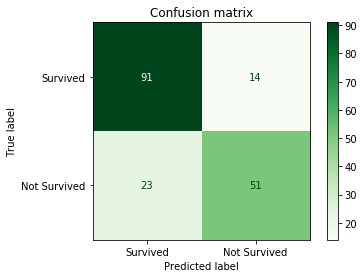

In [32]:
#confusion matrix using Scikitlearn - Logistic Regressiob=n
from sklearn.metrics import plot_confusion_matrix

class_names = ['Survived','Not Survived']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
classifier = model_lr #Logistic Regression classifier from above
title = "Confusion matrix"
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

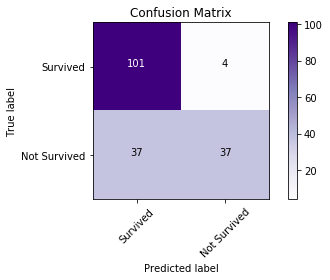

In [22]:
  #Confusion Matrix different probabilities

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
classes = ['Survived','Not Survived']
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], fmt),horizontalalignment="center",color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [23]:
Recall = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
Precision = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Recall - {}; Precision - {}'.format(Recall,Precision))

Recall - 0.7318840579710145; Precision - 0.9619047619047619


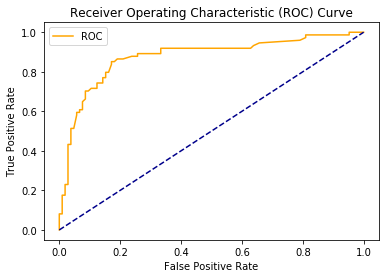

(0.08571428571428572, 0.7027027027027027, 0.5114283198218461)
(0.09523809523809523, 0.7027027027027027, 0.5066994254192508)
(0.10476190476190476, 0.7162162162162162, 0.5022230344029539)
(0.12380952380952381, 0.7162162162162162, 0.44335673020637656)
(0.12380952380952381, 0.7432432432432432, 0.373120206388222)
(0.14285714285714285, 0.7432432432432432, 0.3588942059730618)
(0.14285714285714285, 0.7702702702702703, 0.34756290881813373)
(0.1523809523809524, 0.7702702702702703, 0.33699746401964675)
(0.1523809523809524, 0.7972972972972973, 0.3190203208735426)
(0.1619047619047619, 0.7972972972972973, 0.3077944445399127)
(0.17142857142857143, 0.8378378378378378, 0.2896730078646121)
(0.17142857142857143, 0.8513513513513513, 0.28904681829476053)
(0.18095238095238095, 0.8513513513513513, 0.28684313503777686)
(0.19047619047619047, 0.8648648648648649, 0.2835989024487513)
(0.20952380952380953, 0.8648648648648649, 0.27958831715224425)
(0.23809523809523808, 0.8783783783783784, 0.2727495120148904)
(0.257

In [15]:
#ROC Curve
probs = model.predict_proba(X_test)
#print(probs)
probs_positive = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs_positive)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
roc_params = list(zip(fpr, tpr, thresholds))
for item in roc_params: 
  if item[1] > 0.7:
    print(item)

In [21]:
#experiments
y_pred = (model.predict_proba(X_test)[:,1] >= 0.7).astype(int); y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])